In [1]:
%%capture
# import the all libarieries
!pip install pyforest
!pip install openpyxl
!pip install fancyimpute

In [2]:
# read the excel file 
df=pd.read_excel(r"C:\Users\tarunkumarsher\Downloads\Health_insurance_cost (1).xlsx",engine='openpyxl')
df.head()

<IPython.core.display.Javascript object>

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
# to check the no of rows and columns 
df.shape

(1338, 7)

In [4]:
# to check the information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
# to check the null values in the data set 
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [6]:
# to be check mean and mode values in the data set 
df.describe(include ='all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [7]:
%%capture
!pip install missingno

<Axes: >

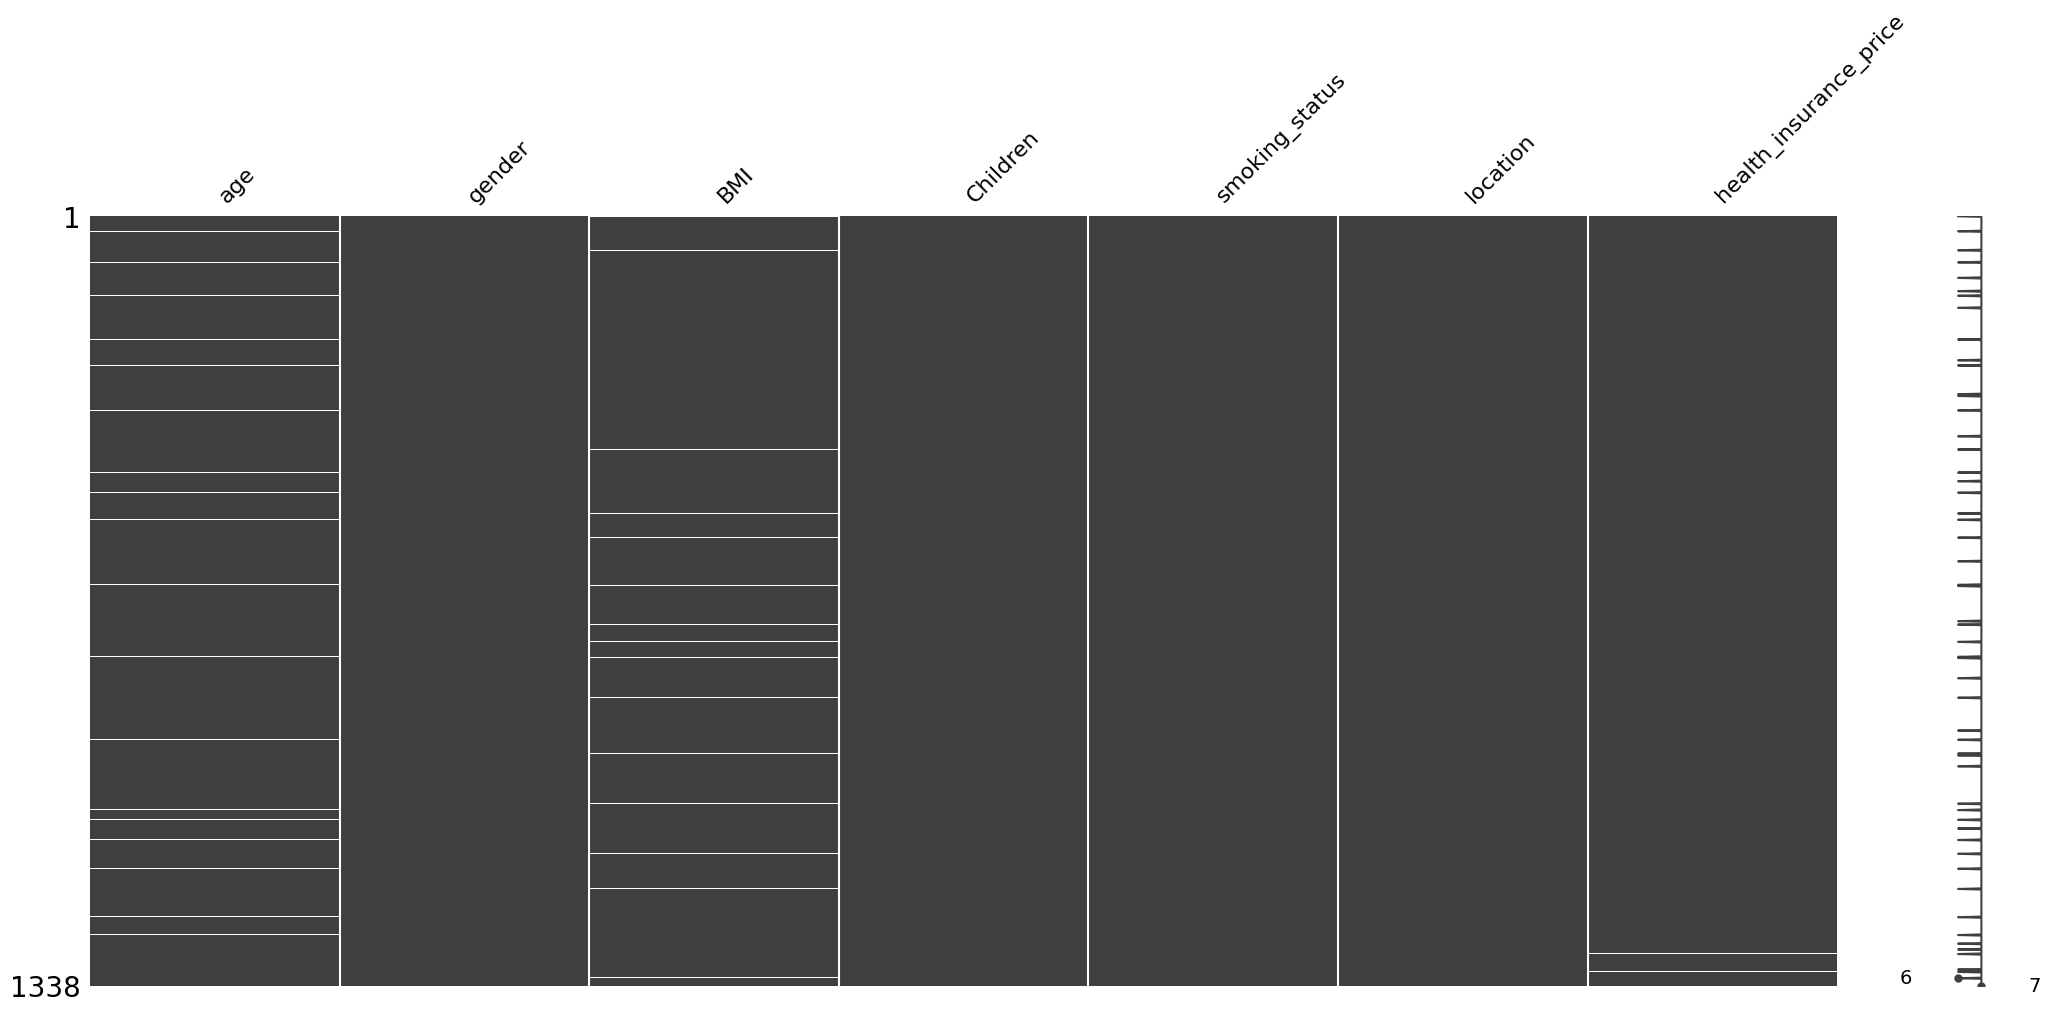

In [8]:
# to check the missing values inthe dataset 
import missingno as msno
msno.matrix(df)

In [9]:
# to find the howmuch percentage in the missing values
df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

<Axes: >

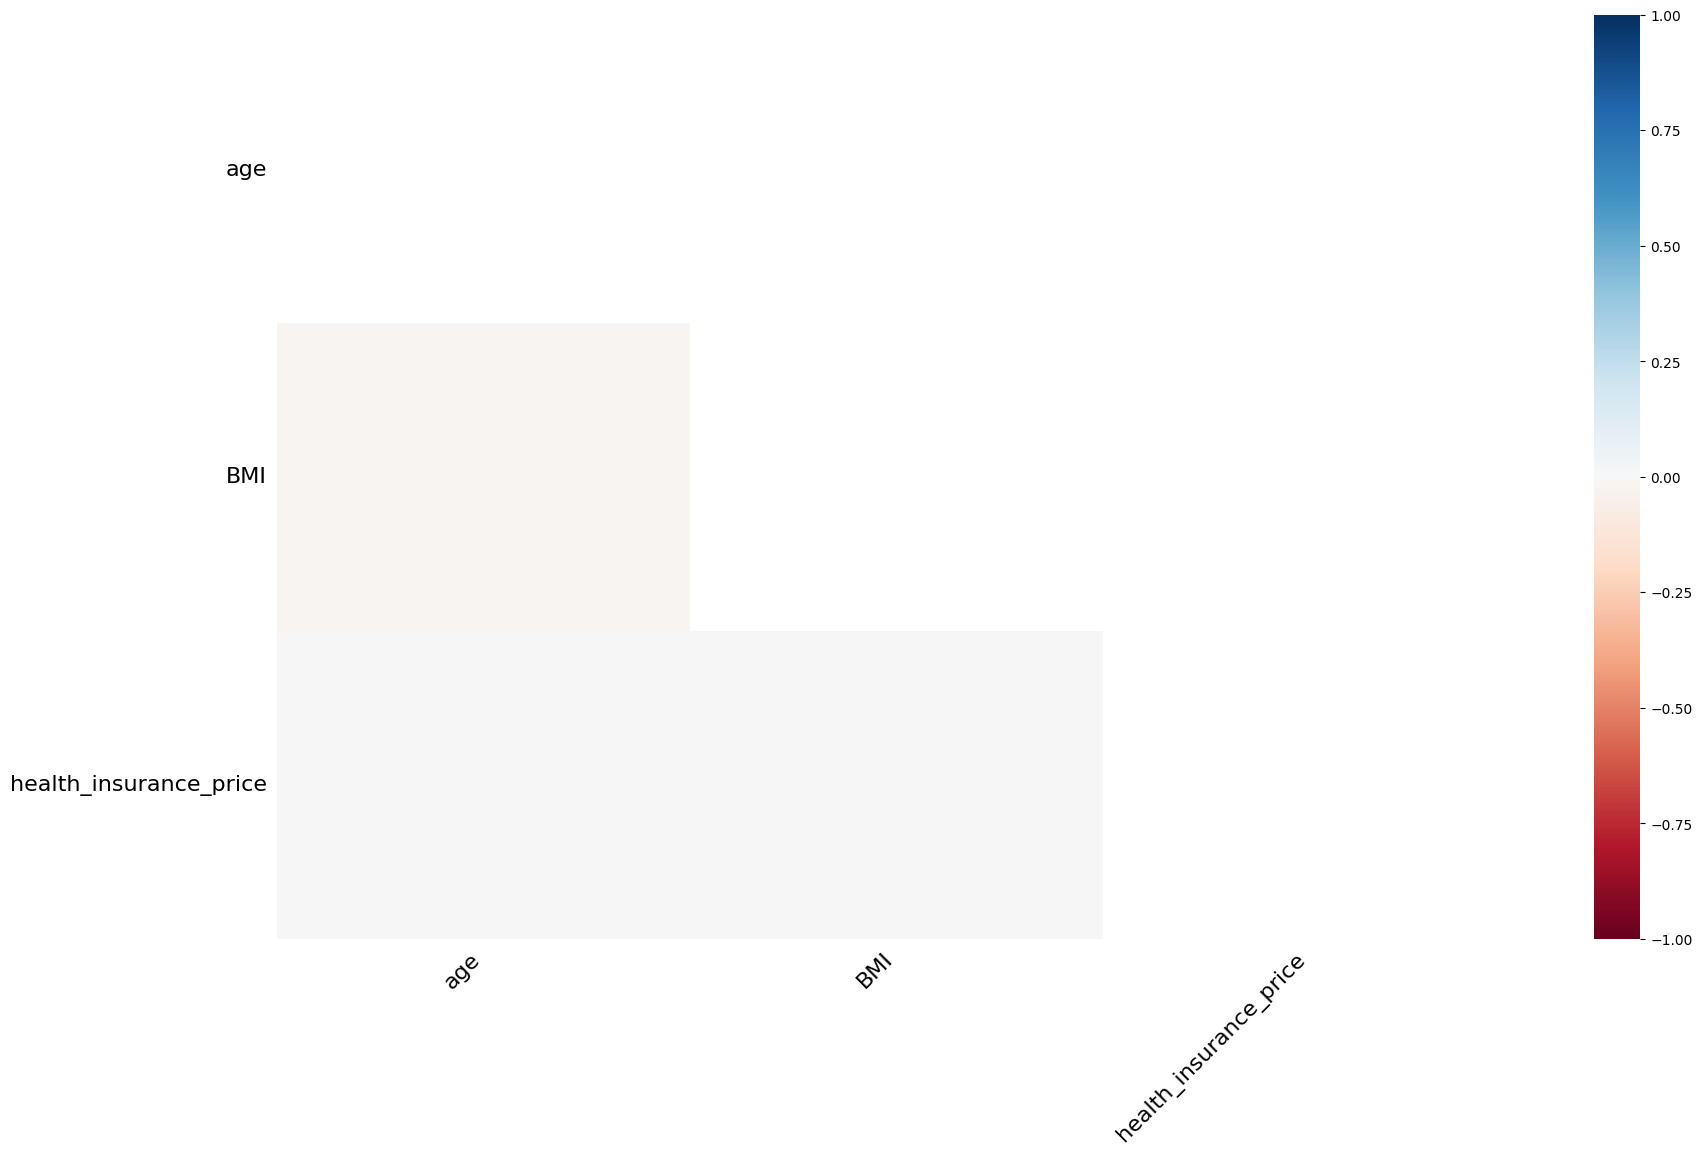

In [10]:
# to check the corelation from missing values
msno.heatmap(df)

In [11]:
# to check the colums
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [12]:
# to check the unique values in column wise 
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df['smoking_status'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['location'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [16]:
# applying the hot encoding 
df1=pd.get_dummies(df,columns=['gender','smoking_status','location'],drop_first=True,dtype=int)
df1.head()

<IPython.core.display.Javascript object>

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,NaN,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0


In [17]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

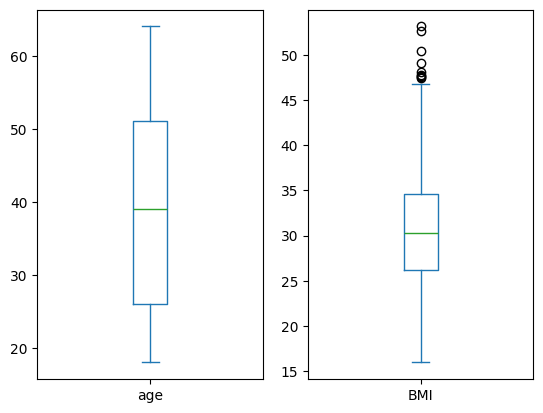

In [18]:
# to check the outliers in the columns
plt.subplot(1,2,1)
df['age'].plot(kind='box')
plt.subplot(1,2,2)
df['BMI'].plot(kind='box')


In [19]:
# age feature can be filled with mean value and BMI,health_insurance_price feature can be filled with mode values
df1['age']=df1['age'].fillna(df1['age'].mean())
df1['BMI']=df1['BMI'].fillna(df1['BMI'].mode()[0])
df1['health_insurance_price']=df1['health_insurance_price'].fillna(df1['health_insurance_price'].mode()[0])

In [20]:
df1.isnull().sum()

age                       0
BMI                       0
Children                  0
health_insurance_price    0
gender_male               0
smoking_status_yes        0
location_northwest        0
location_southeast        0
location_southwest        0
dtype: int64

In [21]:
# warning importing 
import warnings
warnings.filterwarnings('ignore')

In [22]:
#KNN imputatin for missing values
from fancyimpute import KNN
knn=KNN()
df1_kn=df1.copy(deep=True)
df1_kn.iloc[:,:]=knn.fit_transform(df1_kn)

C:\Users\tarunkumarsher\AppData\Local\Programs\Python\Python312\Lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/1338 with 0 missing, elapsed time: 0.634
Imputing row 101/1338 with 0 missing, elapsed time: 0.634
Imputing row 201/1338 with 0 missing, elapsed time: 0.634
Imputing row 301/1338 with 0 missing, elapsed time: 0.634
Imputing row 401/1338 with 0 missing, elapsed time: 0.650
Imputing row 501/1338 with 0 missing, elapsed time: 0.650
Imputing row 601/1338 with 0 missing, elapsed time: 0.650
Imputing row 701/1338 with 0 missing, elapsed time: 0.650
Imputing row 801/1338 with 0 missing, elapsed time: 0.650
Imputing row 901/1338 with 0 missing, elapsed time: 0.650
Imputing row 1001/1338 with 0 missing, elapsed time: 0.650
Imputing row 1101/1338 with 0 missing, elapsed time: 0.650
Imputing row 1201/1338 with 0 missing, elapsed time: 0.650
Imputing row 1301/1338 with 0 missing, elapsed time: 0.650


In [23]:
#mice imputation from missing values
from fancyimpute import IterativeImputer 
mice=IterativeImputer()
df1_mice=df1.copy(deep=True)
df1_mice.iloc[:,:]=mice.fit_transform(df1_mice)

In [24]:
# checking the statistical performance from knn and mice
df1_kn.describe()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.166412,30.666783,1.094918,13251.145112,0.505232,0.204783,0.242900,0.272048,0.242900
std,13.907422,6.061370,1.205493,12112.075916,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4724.369462,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.166412,30.495000,1.000000,9369.615750,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.430000,2.000000,16584.318157,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df1_mice.describe()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.166412,30.666783,1.094918,13251.145112,0.505232,0.204783,0.242900,0.272048,0.242900
std,13.907422,6.061370,1.205493,12112.075916,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4724.369462,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.166412,30.495000,1.000000,9369.615750,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.430000,2.000000,16584.318157,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# After closing the knn imputation to check top 5 rows 
df1_kn.head()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,32.300,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0


In [27]:
df1_mice.head()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,32.300,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0


## Data Visuvalization

In [28]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

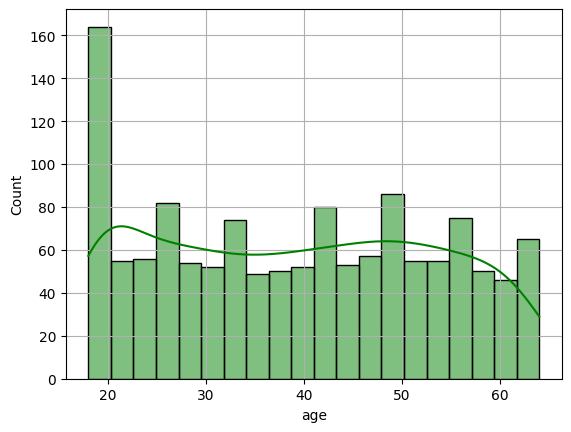

In [29]:
sns.histplot(data=df,x=df['age'],bins=20,color='green',kde=True)
plt.grid(True)

Looks like most of the coustomer are 18 to 21 and lesser than the range of 35 to 40 

In [30]:
df['Children'].value_counts()

Children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

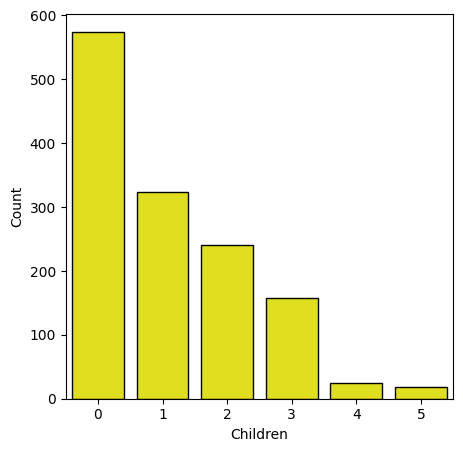

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Children'],color='yellow',edgecolor='black')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

Majority of the customers have no child .That said,customers with 1 children followed by 2 and so on .

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

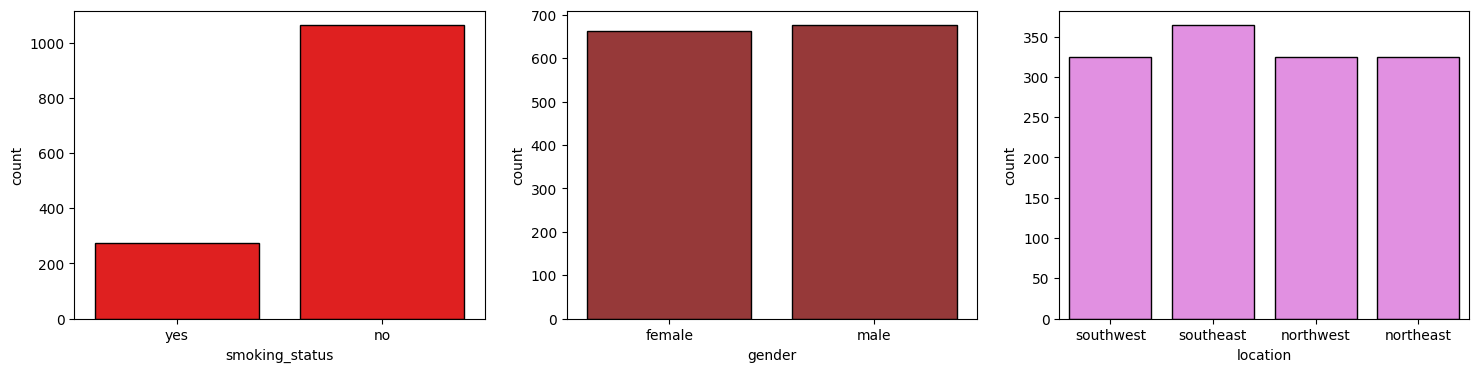

In [32]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.countplot(data=df,x=df['smoking_status'],color='red',edgecolor='black')
plt.subplot(1,3,2)
sns.countplot(data=df,x=df['gender'],color='brown',edgecolor='black')
plt.subplot(1,3,3)
sns.countplot(data=df,x=df['location'],color='violet',edgecolor='black')
plt.show()

1. Inthe data set majority of the customers have non-smokers 
2. Inthe given data set male and female customers have equal ratio
3. Inthe given data set most southeast location has the higest people living and northwest,northeast,southwest locations are same proporation of the peoples.

<IPython.core.display.Javascript object>

<Axes: xlabel='BMI', ylabel='Count'>

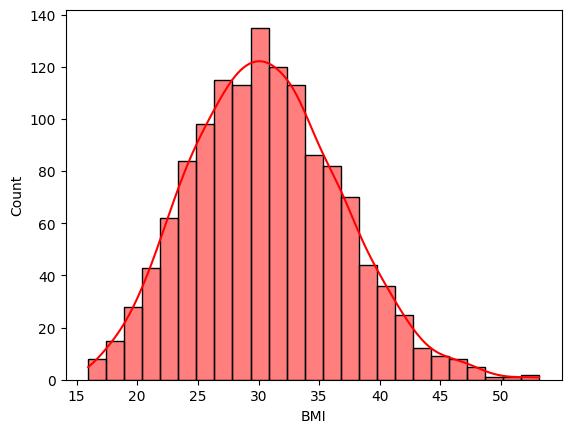

In [33]:
# to check the BMI in visualizing 
sns.histplot(data=df['BMI'],color='red',kde=True)

From the histogram it looks like BMI of customers have follows normal distrubution.However let's verify

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

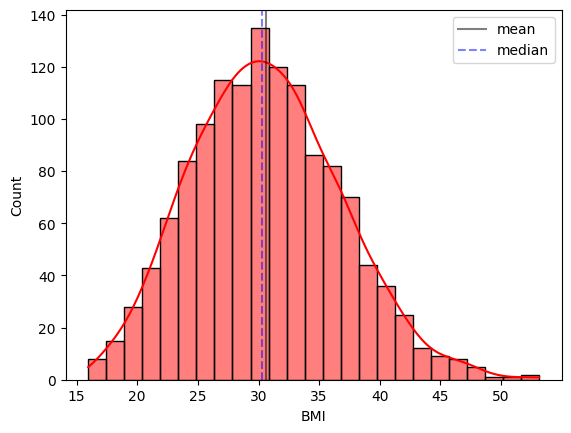

In [34]:
sns.histplot(data=df['BMI'],color='red',kde=True)
plt.axvline(x=df.BMI.mean(),color='black',alpha=0.5,label='mean')
plt.axvline(x=df.BMI.median(),color='blue',ls='--',alpha=0.5,label='median')
plt.legend()

Mean and Median are equal so its shows as Normaldistrubution form the BMI feature.The values fall between 20 to 40

In [35]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

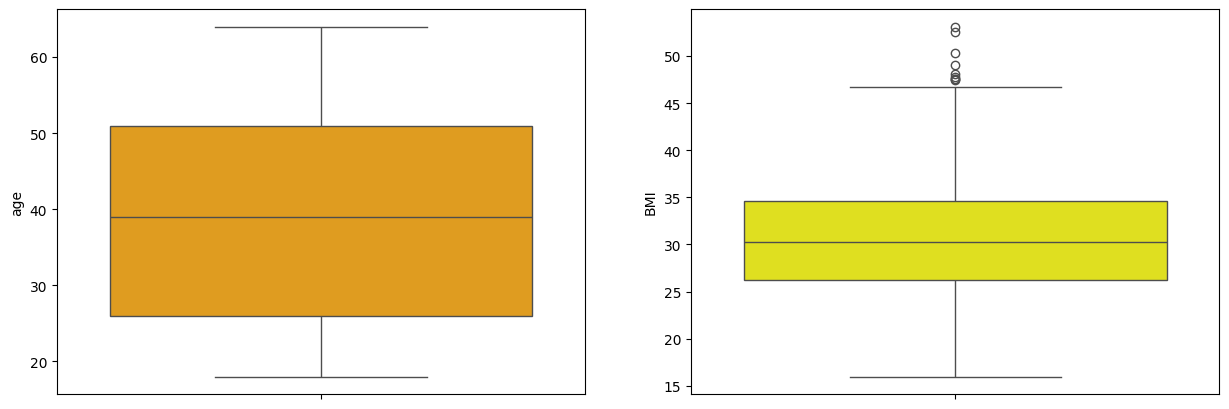

In [36]:
# to check the outliers in the age column and bmi column
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df['age'],color='orange')
plt.subplot(1,2,2)
sns.boxplot(data=df['BMI'],color='yellow')
plt.show()

1.In the age column they don't have any outliers 
2.In the BMI column they have an outliers present inthe column.

In [37]:
# i have to copy the knn relation dataset 
copy_df_kn=df1_kn.copy()

In [38]:
# Dealing with outliers 
Q1=df1_kn['BMI'].quantile(0.25)
Q3=df1_kn['BMI'].quantile(0.75)
iqr=Q3-Q1
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit)
print(lower_limit)
print(df1_kn.shape)

46.6025
14.142500000000004
(1338, 9)


<IPython.core.display.Javascript object>

<Axes: ylabel='BMI'>

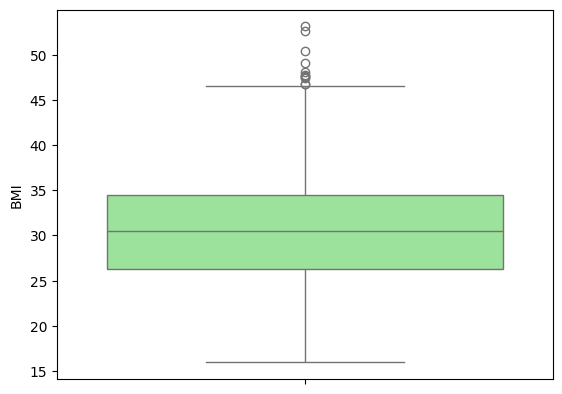

In [39]:
sns.boxplot(copy_df_kn['BMI'],color='lightgreen')

In [40]:
copy_df_kn['zscore']=(copy_df_kn.BMI-copy_df_kn.BMI.mean())/copy_df_kn.BMI.std(ddof=0)
copy_df_kn['zscore'].unique()

array([ 2.69547670e-01,  5.12157780e-01,  3.85076294e-01, -1.31401968e+00,
       -2.94892178e-01, -8.13120576e-01,  4.57694286e-01, -4.83038794e-01,
       -1.38103331e-01, -7.96616487e-01, -7.33900948e-01, -7.22348086e-01,
        6.16133541e-01,  1.51065517e+00,  1.89189963e+00, -1.00126719e+00,
        1.86855152e-02, -1.12587306e+00,  1.58987480e+00,  7.64670343e-01,
        8.81024172e-01,  2.86051759e-01,  5.66621274e-01,  2.06832131e-01,
       -4.36002140e-01, -4.86339612e-01, -1.25130414e+00,  3.47942093e-01,
       -2.19203722e+00,  9.29711234e-01,  8.14182611e-01, -7.18222064e-01,
       -3.41103627e-01, -3.88965486e-01,  9.46215324e-01, -1.69031291e+00,
        3.79299862e-01, -1.62842258e+00,  9.90776364e-01,  1.52385844e+00,
       -6.71185410e-01,  9.84174729e-01, -1.46668251e+00,  2.19863331e-02,
        1.05349190e+00,  1.09475213e+00,  1.32003294e+00,  6.77198671e-01,
       -1.01282005e+00,  7.48166254e-01,  8.18308633e-01,  4.89052055e-01,
       -4.40128162e-01,  

In [41]:
#Usually we will consider anything morethan 3sd as an outlier
copy_df_kn[(copy_df_kn['zscore']>3)]

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest,zscore
116,58.0,49.06,0,11381.3254,1,0,0,1,0,3.035633
847,23.0,50.38,1,2438.0552,1,0,0,1,0,3.253487
1047,22.0,52.58,1,44501.3982,1,1,0,1,0,3.616577
1317,18.0,53.13,0,1163.4627,1,0,0,1,0,3.707349


we will see we have 4 rows are consider the more than zscore 3 then we have to remove the outliers and observe in boxplot

In [42]:
# we will remove the rows from the data set 
copy_df_kn=copy_df_kn.drop(labels=[116,847,1047,1317],axis=0)
copy_df_kn.shape

(1334, 10)

<IPython.core.display.Javascript object>

<Axes: ylabel='BMI'>

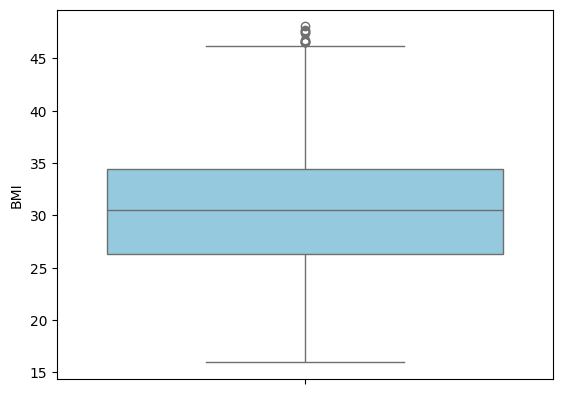

In [43]:
# after dealing with outliers using zscore
sns.boxplot(copy_df_kn['BMI'],color='skyblue')

clearly z score not perform well we will use iqr method

### Bivariant Analysis

In [44]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


## Numerical Numerical variables 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

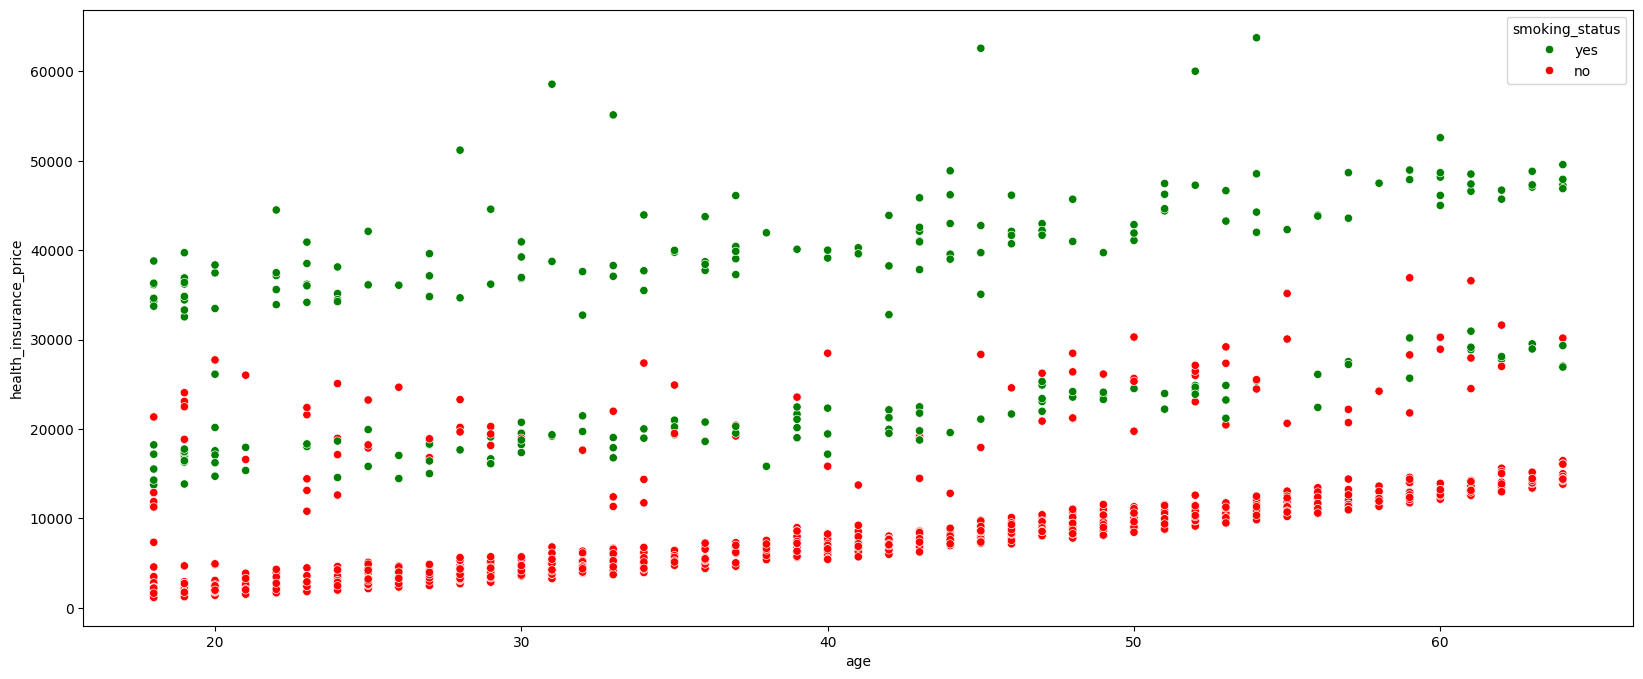

In [45]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['age'],y=df['health_insurance_price'],hue=df['smoking_status'],palette=['green','red'])
plt.show()

Obeservation:
It appears to us that relation between age and insurance_price as we see that increasing age causing increasing price in case of non smokers
having said that, Smokers insurance price are higer in comparision to non smokers

In [46]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

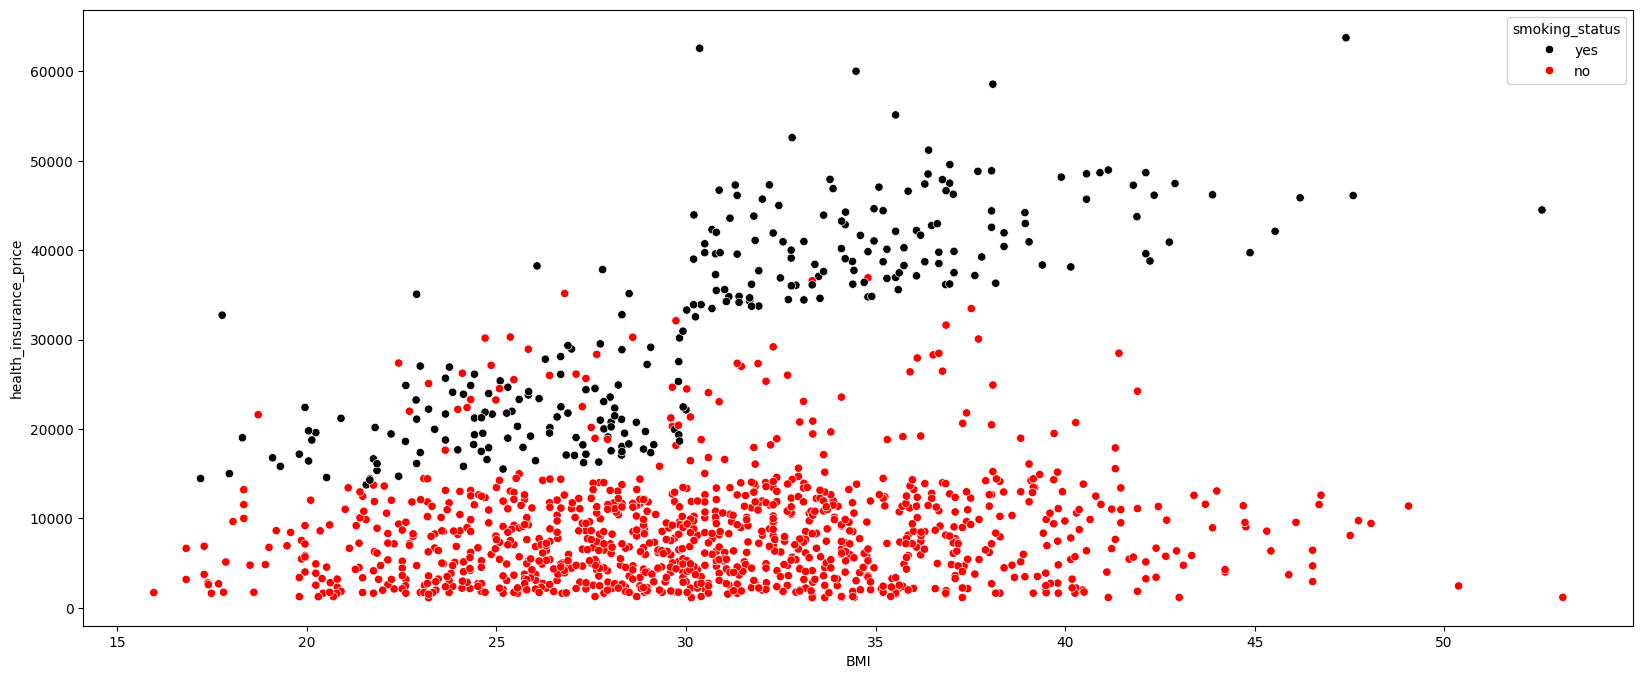

In [47]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['BMI'],y=df['health_insurance_price'],hue=df['smoking_status'],palette=['black','red'])
plt.show()

Observation:
            It appears to us as the BMI smokers increase their insurace price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='age', ylabel='health_insurance_price'>

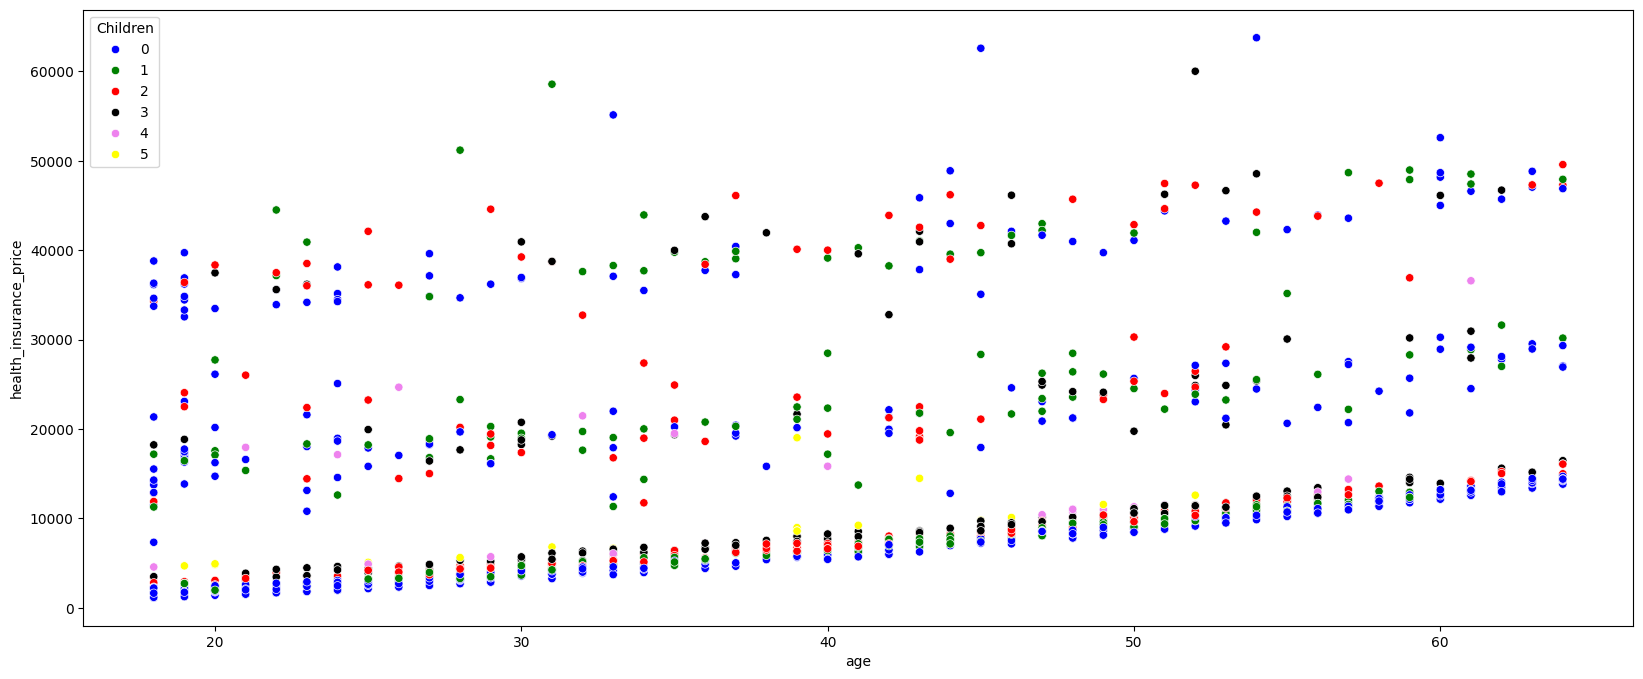

In [48]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['age'],y=df['health_insurance_price'],hue=df['Children'],palette=['blue','green','red','black','violet','yellow'])

Observations:
It is tough to say there is an impact of number of children of people with any age on insurance price.
ex: we can't say elder people with more children paid more insurance price nor we can say younger peopl with more children paid more insurance price.
Similarly, we can't say younger people with less children paid more insurance price nor we can say elder peopl with less children paid more 
insurance price.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

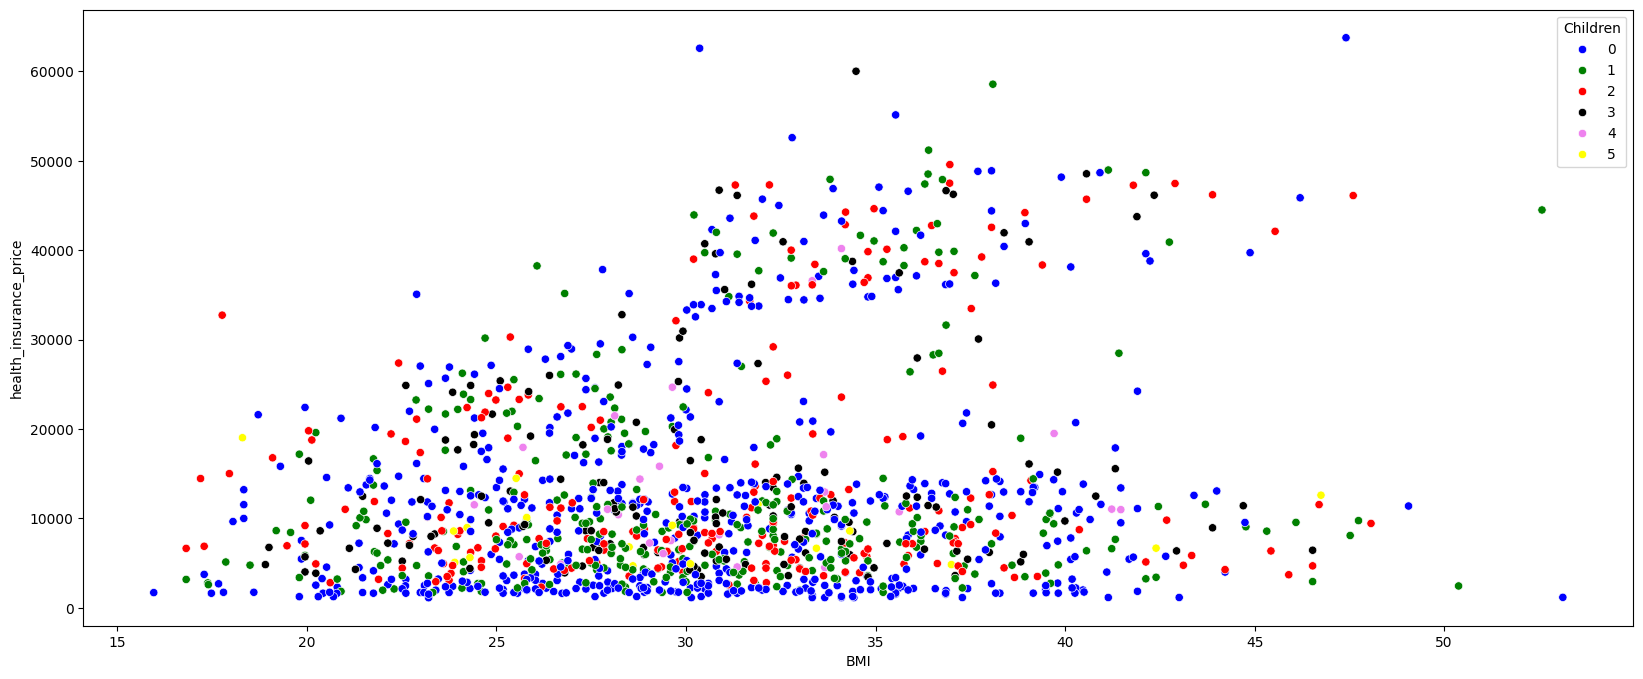

In [49]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['BMI'],y=df['health_insurance_price'],hue=df['Children'],palette=['blue','green','red','black','violet','yellow'])
plt.show()

Observation:
It seems BMI is not having impact on their health_insurance_price.Smoking status is having much impact on their 
health_insurance price as per above figures

## Categorical-Numerical variables

In [50]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [51]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<Axes: xlabel='gender', ylabel='health_insurance_price'>

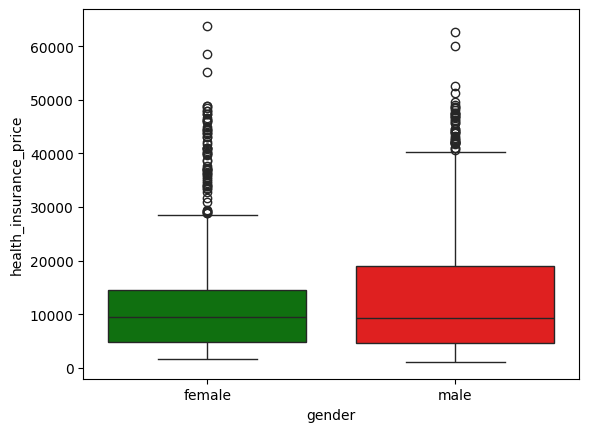

In [52]:
sns.boxplot(data=df,x=df['gender'],y=df['health_insurance_price'],palette=['green','red'])

<IPython.core.display.Javascript object>

<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

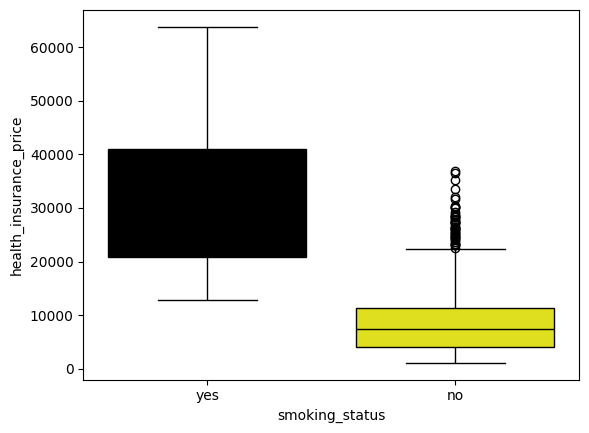

In [53]:
# box plot between smoker and health_insuracne price
sns.boxplot(data=df,x=df['smoking_status'],y=df['health_insurance_price'],palette=['black','yellow'])

There is an impact on the smoking status on health insurance price.if the status is yes is more than the health_insurance price

<IPython.core.display.Javascript object>

<Axes: xlabel='location', ylabel='health_insurance_price'>

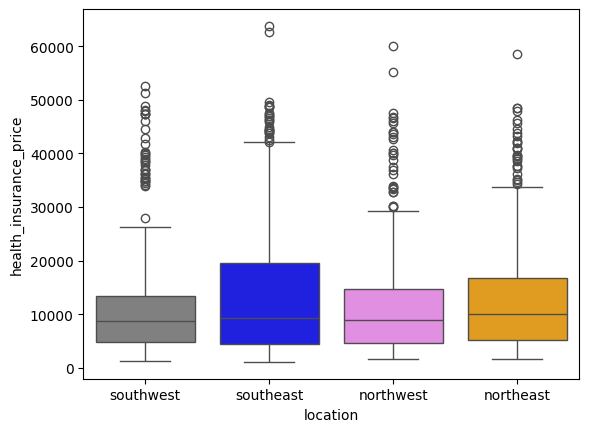

In [54]:
# box plot between location and health insurance price 
sns.boxplot(x=df['location'],y=df['health_insurance_price'],data=df,palette=['gray','blue','violet','orange'])

<IPython.core.display.Javascript object>

<Axes: xlabel='Children', ylabel='health_insurance_price'>

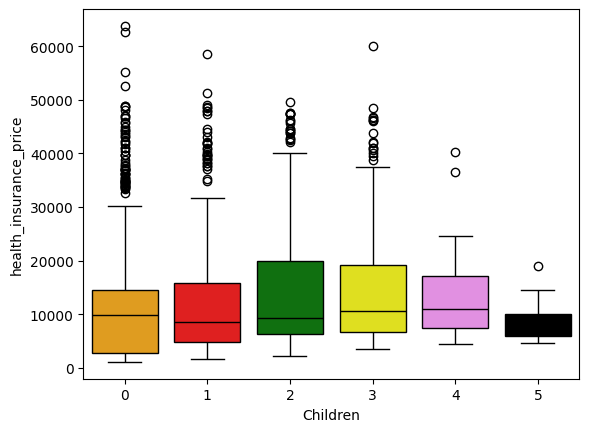

In [55]:
# compare the house insurance price and children columns
sns.boxplot(x=df['Children'],y=df['health_insurance_price'],palette=['orange','red','green','yellow','violet','black'])

Looking at each of the group median value,we can say that there is not much impact on the health_insurance price

<IPython.core.display.Javascript object>

<Axes: xlabel='Children', ylabel='health_insurance_price'>

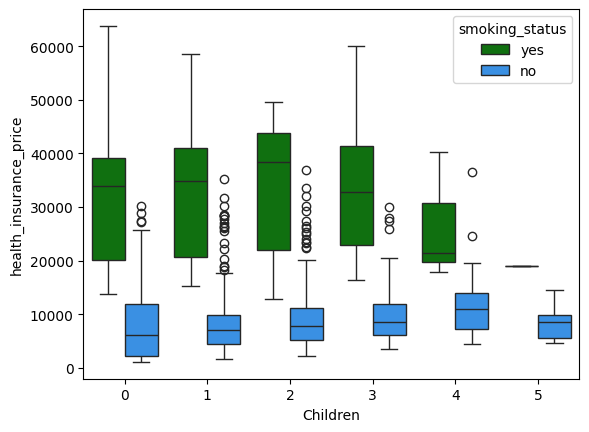

In [56]:
sns.boxplot(data=df,x=df['Children'],y=df['health_insurance_price'],hue='smoking_status',palette=['green','dodgerblue'])

In [57]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<Axes: xlabel='Children', ylabel='age'>

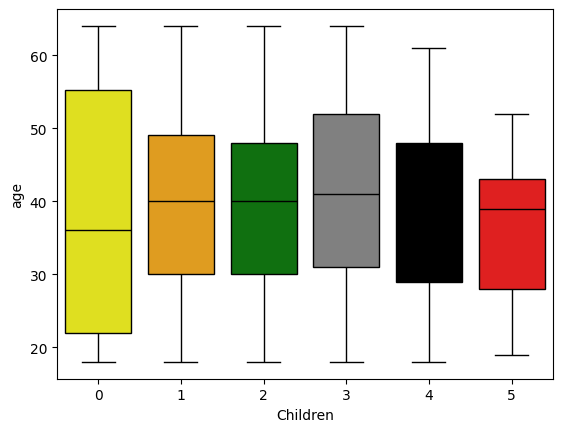

In [58]:
sns.boxplot(data=df,x=df['Children'],y=df['age'],palette=['yellow','orange','green','gray','black','red'])

From this figure we can't say the elder people have the more children or less children.Simillarly we can't say younger people have more children
or less children.Bascally children is not determined by age

<IPython.core.display.Javascript object>

<Axes: xlabel='Children', ylabel='BMI'>

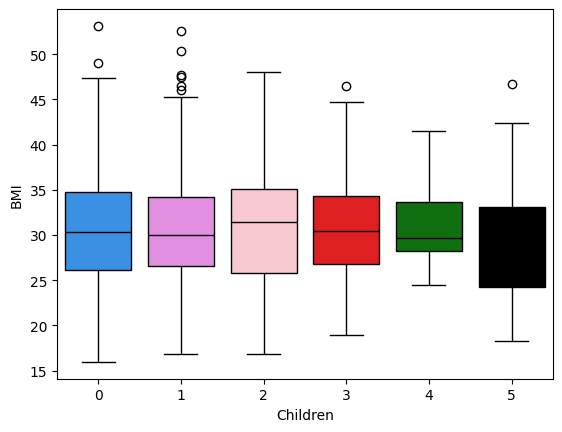

In [59]:
sns.boxplot(data=df,x=df['Children'],y=df['BMI'],palette=['dodgerblue','violet','pink','red','green','black'])

Seemingly there is no effect of number of childrens on peoples BMI

In [60]:
# checking the corelation 
df_corr=pd.DataFrame(df1_kn)
print(df_corr.corr(method='spearman'))

<IPython.core.display.Javascript object>

                             age       BMI  Children  health_insurance_price  \
age                     1.000000  0.106091  0.055595                0.526076   
BMI                     0.106091  1.000000  0.014294                0.118351   
Children                0.055595  0.014294  1.000000                0.131091   
health_insurance_price  0.526076  0.118351  0.131091                1.000000   
gender_male            -0.017259  0.043246  0.015589                0.010966   
smoking_status_yes     -0.021670  0.002218  0.016583                0.658735   
location_northwest     -0.002295 -0.127104  0.034465               -0.024980   
location_southeast     -0.014484  0.246122 -0.019531                0.018732   
location_southwest      0.018291  0.000959  0.011466               -0.042072   

                        gender_male  smoking_status_yes  location_northwest  \
age                       -0.017259           -0.021670           -0.002295   
BMI                        0.043246      

Barring age which has moderate corelation,we don't see much of the coorelation between target variable and I variable

In [61]:
# Examin the multicolearinty by using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variable set 
X_vif=df1_kn.drop(['health_insurance_price'],axis=1)
# Vif DataFrame
vif_data=pd.DataFrame()
vif_data['feature']=X_vif.columns
vif_data['VIF']= [variance_inflation_factor(X_vif.values,i)
                        for i in range(len(X_vif.columns))]
# print the multicoleanrity 
print(vif_data)

<IPython.core.display.Javascript object>

              feature        VIF
0                 age   7.791572
1                 BMI  11.404401
2            Children   1.809436
3         gender_male   2.004181
4  smoking_status_yes   1.261574
5  location_northwest   1.889160
6  location_southeast   2.260048
7  location_southwest   1.959956


In [62]:
X_vif.head()

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,32.300,0,0,1,0,0,1
1,18.0,33.770,1,1,0,0,1,0
2,28.0,33.000,3,1,0,0,1,0
3,33.0,22.705,0,1,0,1,0,0
4,32.0,28.880,0,1,0,1,0,0


In [63]:
X=X_vif.drop(['age','BMI'],axis=1)

In [64]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)
                 for i in range(len(X.columns))]
print(vif_data)

<IPython.core.display.Javascript object>

              feature       VIF
0            Children  1.612259
1         gender_male  1.726813
2  smoking_status_yes  1.232547
3  location_northwest  1.330427
4  location_southeast  1.389662
5  location_southwest  1.332648


After droping the VIF >5  we are left with minimum values 
In the interst of avoiding multicoleaarity we lost many of the features
Therefore i am not using linear regression as it did not perform well when i checked it beacuse of which i choose non-parametric algorithms
like rf,dt and svm .

In [65]:
# Separating the variables 
X=df1_kn.drop(['health_insurance_price'],axis=1)
y=df1_kn['health_insurance_price']

In [66]:
X.head()

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,32.300,0,0,1,0,0,1
1,18.0,33.770,1,1,0,0,1,0
2,28.0,33.000,3,1,0,0,1,0
3,33.0,22.705,0,1,0,1,0,0
4,32.0,28.880,0,1,0,1,0,0


In [67]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [68]:
X.shape

(1338, 8)

## Feature selection

In [69]:
# Backward feature elimination technique
# you can choose differnet one and you can proceed 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe=RFE(estimator=DecisionTreeRegressor(random_state=42),n_features_to_select=8)
rfe=rfe.fit(X,y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['age', 'BMI', 'Children', 'gender_male', 'smoking_status_yes',
       'location_northwest', 'location_southeast', 'location_southwest'],
      dtype='object')
[ True  True  True  True  True  True  True  True]


array([1, 1, 1, 1, 1, 1, 1, 1])

Let's use with columns ranks 1

In [70]:
# Using ranked 1 columns to create X Dataframe
X=X[['age','BMI','Children','gender_male','smoking_status_yes','location_northwest','location_southeast','location_southwest']]

In [71]:
X.shape

(1338, 8)

In [72]:
y.shape

(1338,)

In [73]:
#performing the cross validation technique by using split function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Feature Scaling 

In [74]:
# Performing transformation of data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.47954933, -1.76907725,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.55130731, -1.04185638, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.91009722, -0.95199385, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.34064512, -0.89957404, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16627252,  2.83221727,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.12537117, -0.11327687, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [75]:
X_test=sc.fit_transform(X_test)
X_test

array([[ 0.46798398, -0.9347745 ,  0.82250933, ..., -0.58884095,
        -0.65814518, -0.54284988],
       [-0.18650541, -0.15866131, -0.89961958, ...,  1.69825145,
        -0.65814518, -0.54284988],
       [ 1.84968379, -0.6608522 , -0.89961958, ...,  1.69825145,
        -0.65814518, -0.54284988],
       ...,
       [-0.04106332, -0.47823733, -0.03855512, ..., -0.58884095,
        -0.65814518, -0.54284988],
       [ 1.12247336,  2.62701637, -0.89961958, ..., -0.58884095,
         1.51942159, -0.54284988],
       [ 0.90431023,  0.51092654, -0.03855512, ..., -0.58884095,
        -0.65814518,  1.84212991]])

## Random Forest Regressor

In [76]:
# import the randomforest regressor 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred1=rf.predict(X_test)

In [77]:
# checking the metrix from random forest regressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred1)))
print('Adjusted R2 Score:',r2_score(y_test,y_pred1))

Mean Absolute Error: 2925.5711748234507
Mean Squared Error: 23515644.997087985


<IPython.core.display.Javascript object>

Root Mean Squared Error: 4849.293247174065
Adjusted R2 Score: 0.848737217872369


## Support Vector Machine

In [78]:
# import the support vector machine
from sklearn.svm import SVR
sr=SVR(kernel='rbf')
sr.fit(X_train,y_train)

SVR()

In [79]:
# predicting the y
y_pred=sr.predict(X_test)

In [80]:
# checking the metrix values from svr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Adjusted R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 8622.996580342542
Mean Squared Error: 166308395.10900882


<IPython.core.display.Javascript object>

Root Mean Square Error: 12896.061224614623
Adjusted R2 score: -0.06976740542243909


## XGBOOST

In [81]:
%%capture
!pip install xgboost
import xgboost as xgb

In [82]:
xgb_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,alpha=10,max_depth=5,n_estimators=10)

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_test)

In [85]:
# import the metrics from xgboost 
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Adjusted R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 7801.919588572994
Mean Squared Error: 106806119.54441063


<IPython.core.display.Javascript object>

Root Mean Square Error: 10334.704618149985
Adjusted R2 score: 0.3129769227021195


## Decision Tree Regressor

In [86]:
# import the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Adjusted R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 3302.616394884328
Mean Squared Error: 45356626.58026142


<IPython.core.display.Javascript object>

Root Mean Square Error: 6734.732851439722
Adjusted R2 score: 0.708246593903591


In [88]:
dt.score(X_train,y_train)

0.9983079367805424

In [89]:
dt.score(X_test,y_test)

0.708246593903591

Apperently, our data is overfitting the training data.Therfore,we need to initializing the hyperparameters to our model to avoid 
letting it in the leafnode.
We got alomost 100% on training data 
That's why we are getting high score on training data and less score on test data
we can perform hyperparameter tuning on the data 
There are sample tuning methods but we are going to use GridSearch or RandomizedSearch for hyperparameter tuning 

In [90]:
# Hyper parameter range initialization for tuning
parameters={'splitter':['best','random'],
            'max_depth':[1,3,5,7,9,11,13],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
            'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]}

In [91]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

#tuning_model.fit(X_train,y_train)

#best parameters
#tuning_model.best_params_

#tuning_hyper_model=DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random)

Gridsearch hyperparameter takes a lot of time taken from the train the model so i have to choose RandomizesSearch hyper parameter 

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
rs=RandomizedSearchCV(dt,param_distributions=parameters,cv=5,n_iter=300,n_jobs=-1,verbose=True,scoring='neg_mean_squared_error')

In [94]:
rs.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error', verbose=True)

In [95]:
# lets check best parameters and best scores
print('Best parameter:',rs.best_params_,end='\n\n')
print('Best Score:',rs.best_score_)

Best parameter: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 5}

Best Score: -33774372.715114966


In [96]:
tuned_model=DecisionTreeRegressor(max_depth=9,max_features=None,max_leaf_nodes=20,min_samples_leaf=4,min_weight_fraction_leaf=0.1,splitter='best')

In [97]:
tuned_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=20, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

In [98]:
#prediction
tuned_pred=tuned_model.predict(X_test)

In [99]:
import matplotlib.gridspec as gridspec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'predicted health_insurance_price')

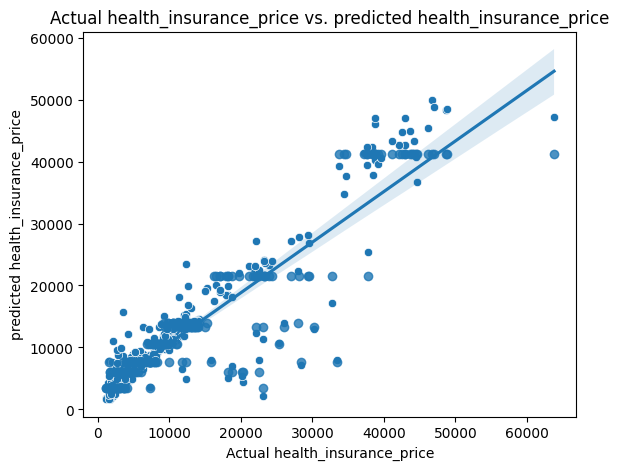

In [100]:
#before and after tuning
fig=plt.figure(figsize=(14,5))
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
ax1=fig.add_subplot(grid[0,0])
sns.scatterplot(x=y_test,y=y_pred1,ax=ax1)
sns.regplot(x=y_test,y=tuned_pred,ax=ax1)
ax1.set_title('Actual health_insurance_price vs. predicted health_insurance_price')
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

There is a significant improvement post tuning and looks the model is performing well comparitively

In [101]:
#model scores on data 
tuned_model.score(X_train,y_train)

0.8162256245313467

In [102]:
tuned_model.score(X_test,y_test)

0.8513293603166616

You can see the difference between the R^2 values with and without hyperparameter tuning.Earlier it was overfitting on training data and test data 
but it did not overfit post hyperparameter tuning.
Error rate of our model with hyperparameter tuning to our orginal model which is without the tuning parameters.

In [103]:
# with hyperparameter tuning check the metrix values 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
print('Mean Absolute Error:',mean_absolute_error(y_test,tuned_pred))
print('Mean Squared Error:',mean_squared_error(y_test,tuned_pred))
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,tuned_pred)))
print('R^2 Score:',r2_score(y_test,tuned_pred))

Mean Absolute Error: 2986.9891170721044
Mean Squared Error: 23112664.82811002


<IPython.core.display.Javascript object>

Root mean Squared Error: 4807.563294238571
R^2 Score: 0.8513293603166616


### Hyper parameter tuning for Random forest Regressor

In [104]:
#Hyper parameters tuning for initialization 
# number of trees in random forest 
n_estimators=[int(x) for x in np.linspace(100,150,5)]
min_samples_split=[2,5,10,26,34]
parameters={'n_estimators':n_estimators,
            'max_depth':[1,3,5,7,9,12,13],
            'min_samples_leaf':[1,3,5,6,8,9],
            'min_samples_split': min_samples_split,
            'max_features': ['auto','sqrt',None]}
              

<IPython.core.display.Javascript object>

In [105]:
from sklearn.model_selection import RandomizedSearchCV
RRF=RandomizedSearchCV(rf,param_distributions=parameters,cv=5,n_iter=10,n_jobs=1)
# fit the train
RRF.fit(X_train,y_train)
# display the best estimator
print(RRF.best_estimator_)
#display the best score
print(RRF.best_score_)
#display the best selected parameters by using randomizedsearch
print(RRF.best_params_)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=137)
0.7885514433496393
{'n_estimators': 137, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 12}


In [106]:
tuned_rf=RandomForestRegressor(max_depth=5,max_features='sqrt',min_samples_leaf=10,min_samples_split=10,n_estimators=400)

In [107]:
#fit the model
tuned_rf.fit(X_train,y_train)
#predict the model
tuned_rf_pred=tuned_rf.predict(X_test)

In [108]:
# random forest score
tuned_rf.score(X_train,y_train)

0.780010798706452

In [109]:
# random forest after tuning score
tuned_rf.score(X_test,y_test)

0.7789820635713113

In [110]:
# random forest score
rf.score(X_train,y_train)

0.9740875939942764

In [111]:
#random forest score on test 
rf.score(X_test,y_test)

0.848737217872369

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'predicted health_insurance_price')

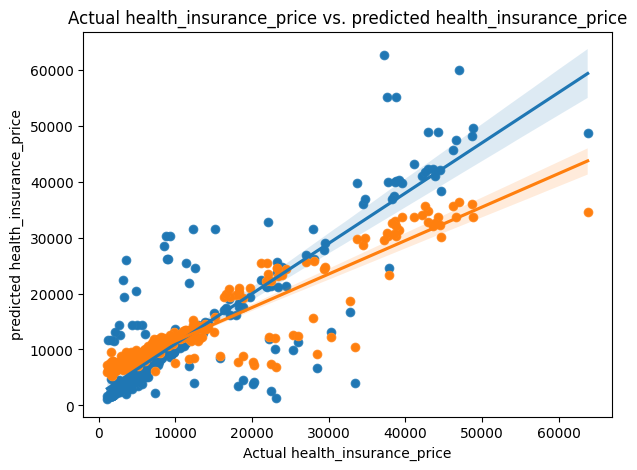

In [112]:
import matplotlib.gridspec as gridspec
fig=plt.figure(figsize=(15,5))
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
ax1=fig.add_subplot(grid[0,0])
sns.scatterplot(x=y_test,y=y_pred,ax=ax1)
sns.regplot(x=y_test,y=y_pred,ax=ax1)
sns.scatterplot(x=y_test,y=tuned_rf_pred,ax=ax1)
sns.regplot(x=y_test,y=tuned_rf_pred,ax=ax1)
ax1.set_title('Actual health_insurance_price vs. predicted health_insurance_price')
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

By looking at the above graph you can estimate the errors will be lesser post performing hyperparameter tuning 

In [113]:
# with hyper parameter tuning 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:',mean_squared_error(y_test,tuned_rf_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 4369.638501399212
MSE: 34359934.79652259


<IPython.core.display.Javascript object>

RMSE: 5861.7347941136495
Adjusted R^2: 0.778352067688216


In [114]:
# without hyper parameter tuning 
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3302.616394884328
MSE: 45356626.58026142


<IPython.core.display.Javascript object>

RMSE: 6734.732851439722
Adjusted R^2: 0.9738922129876356


## Cross validation

In [115]:
# performing the cross validation to pick the best model 
# Random Regressor
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(rf,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [116]:
from numpy import absolute
print(absolute(np.mean(score_train)))

<IPython.core.display.Javascript object>

26774548.20779525


In [117]:
score_test=cross_val_score(rf,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

In [118]:
print(absolute(np.mean(score_test)))

<IPython.core.display.Javascript object>

25458297.88652294


In [119]:
# Decision Tree Regressor
score_t=cross_val_score(dt,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print(absolute(np.mean(score_t)))

<IPython.core.display.Javascript object>

49244762.173859574


In [120]:
score_tt=cross_val_score(dt,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
print(absolute(np.mean(score_tt)))

<IPython.core.display.Javascript object>

43854752.294146046


If we observe crossvalscore of both training and testing data of each model RandomForest Regressor displayed lesser values 
for mean squared error compartievly

In [121]:
# creating a barplot showcasing differnet metrics of decision tree and random forests 

d=[["Randomforestregressor without  HPT",0.9732629663965712,6819.734002330765], ["Randomforestregressor with  HPT",0.7593781423526149,6169.214924525028]]
mac=pd.DataFrame(d,columns=['ModelName','Adjusted R^2','RMSE'])
print(mac)

<IPython.core.display.Javascript object>

                            ModelName  Adjusted R^2         RMSE
0  Randomforestregressor without  HPT      0.973263  6819.734002
1     Randomforestregressor with  HPT      0.759378  6169.214925


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

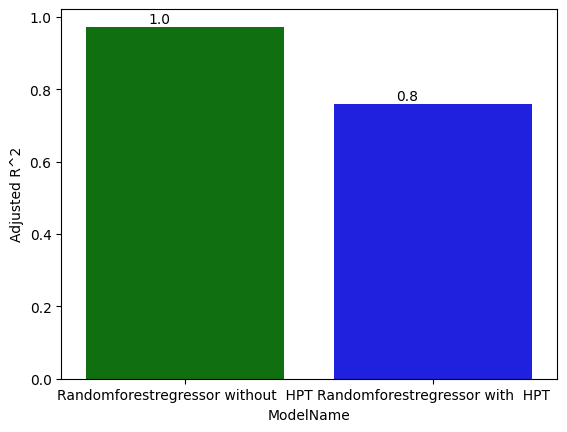

In [122]:
# comparing Adjusted R^2 for before and after tuning using barplot
ax=sns.barplot(data=mac,x=mac['ModelName'],y='Adjusted R^2',palette=['green','blue'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

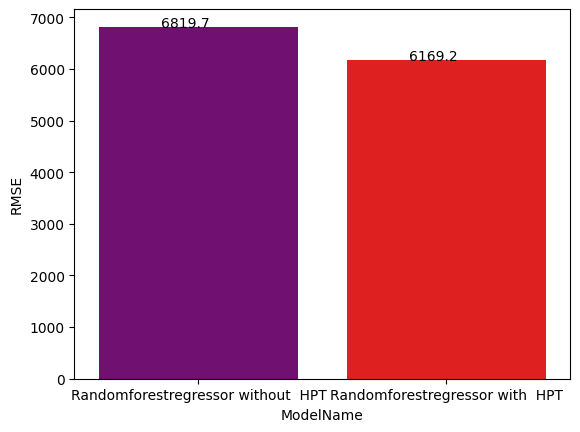

In [123]:
#Comparing rmse by using barplot 
ax=sns.barplot(data=mac,x='ModelName',y='RMSE',palette=['purple','red'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.show()

Simillary, we can create dataframes for all models and barplots accordingly

## Conclusion

Here, we performed 4 differnet models to check which model seems to give least error.we determined that Random forest and Decsion Tree are performing 
well but both of them overfitting.
we can perform cv for all the 4 models and choose the best model based on mean cross validation score and perform hyper parameter tuning 
from best to last.
Finally, The smoking status which has the most influence on health insurance price and random forest with hyperparameter tuning (model) that 
performed better out of all models we tried.